In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [148]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("NTB.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  361 non-null    datetime64[ns]
 1   Tn       357 non-null    float64       
 2   Tx       358 non-null    float64       
 3   Tavg     352 non-null    float64       
 4   RH_avg   352 non-null    float64       
 5   RR       353 non-null    float64       
 6   ss       354 non-null    float64       
 7   ff_x     358 non-null    float64       
 8   ddd_x    358 non-null    float64       
 9   ff_avg   358 non-null    float64       
 10  ddd_car  358 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.1+ KB


<ipython-input-148-0da413c6bdcb>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [149]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,25.2,29.6,7.3,27.4
1,2023-02-01,24.8,30.0,16.6,26.3
2,2023-03-01,23.6,31.2,12.2,26.0
3,2023-04-01,23.8,33.8,2.6,27.7
4,2023-05-01,24.4,33.6,2.6,28.5
...,...,...,...,...,...
356,2023-12-12,24.8,33.2,0.0,29.2
357,2023-12-13,25.0,33.0,0.0,28.2
358,2023-12-14,24.8,32.4,0.0,27.9
359,2023-12-15,25.2,32.9,1.0,28.7


In [150]:
# cek duplikat
df1.duplicated().sum()

11

In [151]:
# hapus duplikat
df1 = df1.drop_duplicates(keep='first').reset_index()
df1.duplicated().sum()

0

In [152]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [153]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,25.2,29.6,7.3,27.4
1,31,31,2023-01-02,23.6,30.0,17.7,26.0
2,59,60,2023-01-03,24.6,31.0,0.0,26.1
3,90,92,2023-01-04,23.0,32.0,0.4,26.2
4,120,123,2023-01-05,23.0,33.1,0.0,27.1
...,...,...,...,...,...,...,...
345,345,356,2023-12-12,24.8,33.2,0.0,29.2
346,346,357,2023-12-13,25.0,33.0,0.0,28.2
347,347,358,2023-12-14,24.8,32.4,0.0,27.9
348,348,359,2023-12-15,25.2,32.9,1.0,28.7


In [154]:
#cek null
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         4
Tx         3
RR         8
Tavg       9
dtype: int64

In [155]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       3
dtype: int64

In [156]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

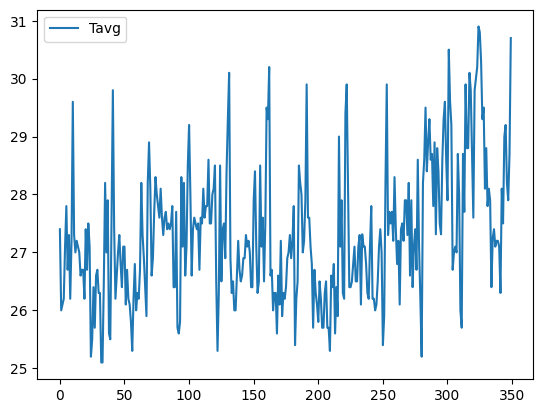

In [157]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

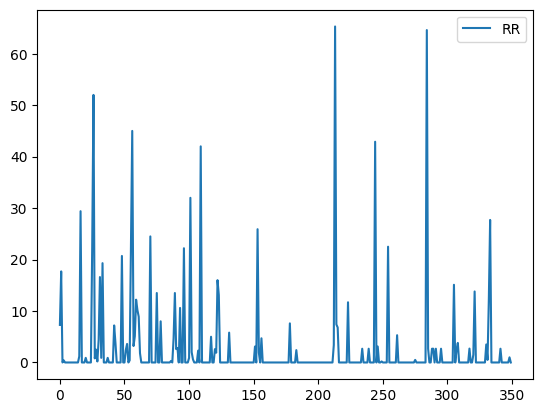

In [158]:
#plotting tavg
df1[['RR']].plot()

In [159]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,25.2,29.6,7.3,27.4,30.0,26.0,17.7
1,31,31,2023-01-02,23.6,30.0,17.7,26.0,31.0,26.1,0.0
2,59,60,2023-01-03,24.6,31.0,0.0,26.1,32.0,26.2,0.4
3,90,92,2023-01-04,23.0,32.0,0.4,26.2,33.1,27.1,0.0
4,120,123,2023-01-05,23.0,33.1,0.0,27.1,34.0,27.8,0.0
...,...,...,...,...,...,...,...,...,...,...
345,345,356,2023-12-12,24.8,33.2,0.0,29.2,33.0,28.2,0.0
346,346,357,2023-12-13,25.0,33.0,0.0,28.2,32.4,27.9,0.0
347,347,358,2023-12-14,24.8,32.4,0.0,27.9,32.9,28.7,1.0
348,348,359,2023-12-15,25.2,32.9,1.0,28.7,33.0,30.7,0.0


In [160]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,7.3,27.4,26.0,17.7
1,17.7,26.0,26.1,0.0
2,0.0,26.1,26.2,0.4
3,0.4,26.2,27.1,0.0
4,0.0,27.1,27.8,0.0
...,...,...,...,...
345,0.0,29.2,28.2,0.0
346,0.0,28.2,27.9,0.0
347,0.0,27.9,28.7,1.0
348,1.0,28.7,30.7,0.0


In [161]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,7.3,27.4,26.0,17.7
1,17.7,26.0,26.1,0.0
2,0.0,26.1,26.2,0.4
3,0.4,26.2,27.1,0.0
4,0.0,27.1,27.8,0.0
...,...,...,...,...
344,0.0,29.0,29.2,0.0
345,0.0,29.2,28.2,0.0
346,0.0,28.2,27.9,0.0
347,0.0,27.9,28.7,1.0


In [162]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [163]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,7.3,27.4,26.0,17.7,0
1,17.7,26.0,26.1,0.0,1
2,0.0,26.1,26.2,0.4,2
3,0.4,26.2,27.1,0.0,3
4,0.0,27.1,27.8,0.0,4
...,...,...,...,...,...
344,0.0,29.0,29.2,0.0,344
345,0.0,29.2,28.2,0.0,345
346,0.0,28.2,27.9,0.0,346
347,0.0,27.9,28.7,1.0,347


In [164]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [165]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [166]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [167]:
X_test

,Indeks,Tavg
279,279,26.2
280,280,25.2
281,281,28.2
282,282,28.6
283,283,29.5
...,...,...
344,344,29.0
345,345,29.2
346,346,28.2
347,347,27.9


In [168]:
#testing
pred1 = lr.predict(X_test)
pred1

array([26.70914202, 26.26956829, 27.58944992, 27.76568557, 28.16185314,
       27.67829302, 27.89851505, 28.0747507 , 27.76713612, 27.81141262,
       27.41582527, 27.8999656 , 27.20186095, 27.85655944, 27.68090401,
       27.28531667, 27.20302139, 27.76974711, 28.07794191, 28.21019117,
       27.77061744, 27.46300286, 28.60693896, 28.21135161, 28.03569619,
       26.9363267 , 27.06857596, 27.11285245, 27.06915618, 27.81721482,
       27.50960024, 26.63016267, 26.49849363, 27.81837526, 27.37880153,
       28.34679208, 27.86323197, 27.86352208, 28.43563518, 28.30396614,
       27.82040603, 27.33684591, 28.30483647, 28.39309935, 28.48136223,
       28.78955703, 28.74586075, 28.52621894, 28.08664521, 28.17490809,
       27.55938882, 27.86758362, 27.42800989, 27.56025915, 27.4725765 ,
       26.81307085, 27.18724522, 27.25351491, 27.12184586, 27.16612236,
       27.16641247, 27.12271619, 26.77111523, 27.56316025, 27.29953206,
       27.95961793, 28.04788081, 27.60830708, 27.47663804, 27.82

In [169]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.9921109690426998 1.606709282285626


In [170]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
279,279,26.2
280,280,25.2
281,281,28.2
282,282,28.6
283,283,29.5
...,...,...
344,344,29.0
345,345,29.2
346,346,28.2
347,347,27.9


In [171]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
279,26.709142
280,26.269568
281,27.589450
282,27.765686
283,28.161853
...,...
344,27.959618
345,28.047881
346,27.608307


In [172]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-172-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,27.4,NaN
1,26.0,NaN
2,26.1,NaN
3,26.2,NaN
4,27.1,NaN
...,...,...
344,29.0,27.959618
345,29.2,28.047881
346,28.2,27.608307
347,27.9,27.476638


<Axes: >

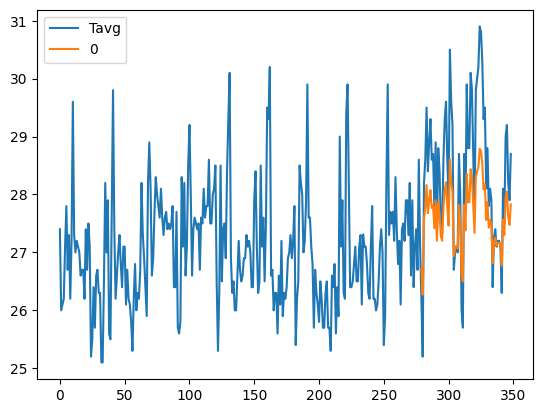

In [173]:
kan.plot()

In [174]:
new_data = [[350, 28.7],[351,28.7],[352,28.7],[353,28.7],[354,28.7],[355,28.7],[356,28.7]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.82939944, 27.82968955, 27.82997966, 27.83026977, 27.83055988,
       27.83084999, 27.8311401 ])

In [175]:
kan.to_json('prediksi ntb')